# Assignment 1

## Part 1

Generating 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$:

In [1]:
import numpy as np

In [2]:
data = np.random.normal(2, 0.125, 5000)

Binning the data:

In [3]:
counts, bins = np.histogram(data, 10)

The function `numpy.histogram` returns two arrays. The first array contains the number of data points in each bin, while the second array provides the edges of the bins.

The two arrays do not have the same length. This is because the first array contains a value for each bin, whereas the second array lists both the starting and ending values for each bin—representing the edges.

Plotting the binned data:

In [4]:
import matplotlib.pyplot as plt

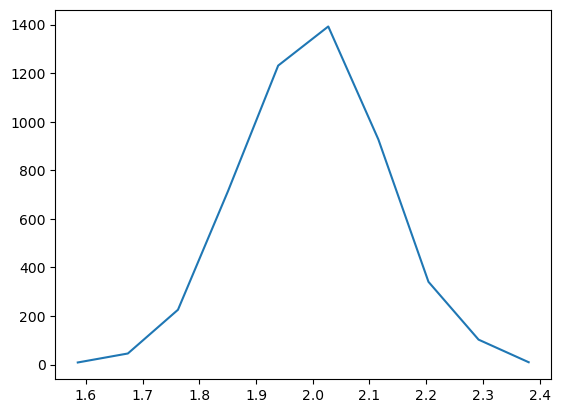

In [5]:
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, counts)
plt.show()

The `bin_centers` list contains the center of each bin. This is calculated by first adding the starting and ending edges of each bin, represented by `bins[:-1]` and `bins[1:]` respectively, and then dividing the sum by two.

---

Generating 5000 datapoints from a Poisson distribution with $\lambda = 10$:

In [6]:
data = np.random.poisson(10, 5000)
data_min, data_max = data.min(), data.max()
data_min, data_max

(0, 23)

Creating the vector `v`:

In [7]:
v = np.arange(data_min, data_max + 1)
counts, bins = np.histogram(data, v)

The sum of the bin counts is 5000, that is the total number of binned data points.

The first element of `v` represents the starting edge of the first bin, i.e., the minimum data point value. The last element of `v` denotes the ending edge of the last bin, i.e., the maximum data point value.

Plotting the binned data:

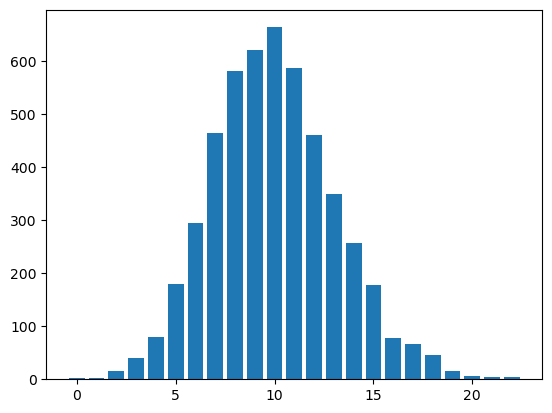

In [8]:
plt.bar(bins[:-1], counts)
plt.show()

---

Finding p for the ER network:

In [9]:
N = 5000
k = 10
p = k / (N-1) # k = p(N-1)

Generating the ER network graph:

In [10]:
import networkx as nx

In [11]:
G = nx.erdos_renyi_graph(N, p)

Binning the data:

In [12]:
degrees = [degree for node, degree in G.degree()]
counts = np.bincount(degrees)

Plotting the binned data:

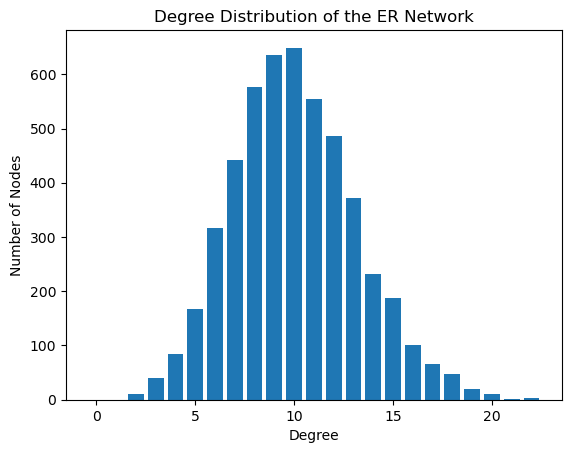

In [13]:
plt.bar(range(len(counts)), counts)
plt.title("Degree Distribution of the ER Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

## Part 4

Generating a 100 node BA network graph:

In [14]:
import networkx as nx
import random

In [15]:
def BA_graph(n):
    G = nx.Graph()
    G.add_edge(0, 1)

    for i in range(2, n):
        nodes = []
        
        for edge in G.edges():
            for node in edge:
                nodes.append(node)

        random_node = random.choice(nodes)
        G.add_edge(i, random_node)

    return G

In [16]:
G = BA_graph(100)

In [17]:
import matplotlib.pyplot as plt

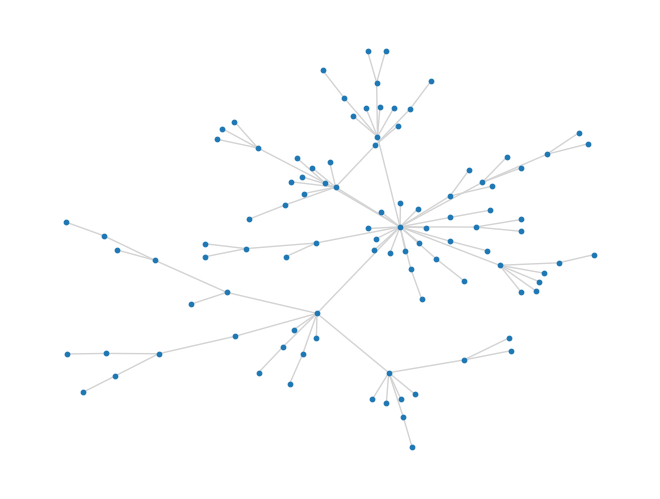

In [18]:
nx.draw(G, with_labels=False, edge_color='lightgrey', node_size=10)
plt.show()

---

Generating a 5000 node BA network graph:

In [19]:
G = BA_graph(5000)

In [20]:
degrees = [degree for node, degree in G.degree()]
degrees_min, degrees_max = min(degrees), max(degrees)
degrees_min, degrees_max

(1, 120)

Binning the data:

In [21]:
import numpy as np

In [22]:
degrees, counts = np.unique(degrees, return_counts=True)

Plotting the binned data:

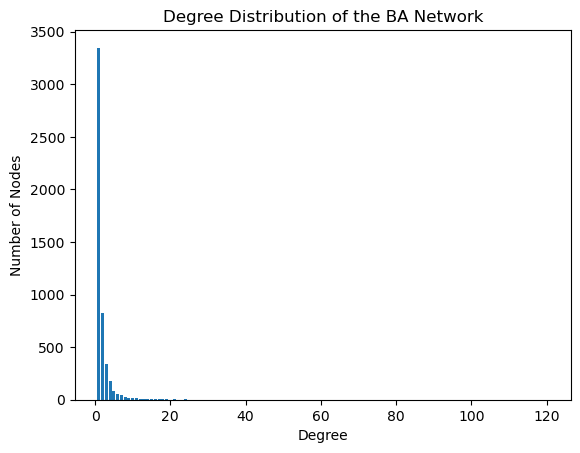

In [23]:
plt.bar(degrees, counts)
plt.title("Degree Distribution of the BA Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

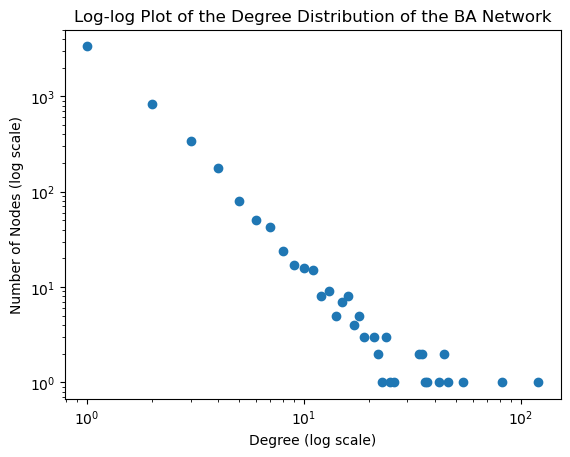

In [24]:
plt.loglog(degrees, counts, 'o')
plt.title("Log-log Plot of the Degree Distribution of the BA Network")
plt.xlabel('Degree (log scale)')
plt.ylabel('Number of Nodes (log scale)')
plt.show()